# Árvores II - Tarefa I



Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#baixar e fazer o downloads dos dados desse link https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip UCI\ HAR\ Dataset.zip


--2024-03-05 01:52:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip.2’

UCI HAR Dataset.zip     [    <=>             ]  58.17M  92.0MB/s    in 0.6s    

2024-03-05 01:52:23 (92.0 MB/s) - ‘UCI HAR Dataset.zip.2’ saved [60999314]

Archive:  UCI HAR Dataset.zip
replace UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Carregue a base features.txt
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep=" ", header=None)
features.shape

(561, 2)

In [ ]:
#Carregue a base subject_train.txt
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", sep=" ", header=None)
subject_train.shape

(7352, 1)

In [ ]:
#Carregue a base X_train.txt
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
X_train.shape

(7352, 561)

In [ ]:
#Coloque o indicador do indivíduo lido em subject_train.txt como uma variável a mais e as colunas deste dataframe tenham os nomes indicados em features.txt
X_train.columns = features[1]
X_train['Subject-index'] = subject_train[0]
X_train

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject-index
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30


In [ ]:
#Defina um índice duplo composto pela ordem do registro e o identificador do registro
X_train = X_train.set_index('Subject-index', append=True)

In [ ]:
#Com a mesma lógica do X_train, carregue a base X_test
subj_test = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt", sep=" ", header=None)
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
X_test.columns = features[1]
X_test['Subject-index'] = subj_test[0]
X_test = X_test.set_index('Subject-index', append=True)
X_test

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject-index,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [ ]:
#Salve as bases em arquivos CSV
X_train.to_csv("./UCI HAR Dataset/X_train_combined.csv")
X_test.to_csv("./UCI HAR Dataset/X_test_combined.csv")

In [ ]:
#Selecione apenas as três primeiras colunas da base
X_train_small = X_train.iloc[:,:3].copy()
X_test_small = X_test.iloc[:,:3].copy()
X_test_small

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
,Subject-index,,,
0,2,0.257178,-0.023285,-0.014654
1,2,0.286027,-0.013163,-0.119083
2,2,0.275485,-0.026050,-0.118152
3,2,0.270298,-0.032614,-0.117520
4,2,0.274833,-0.027848,-0.129527
...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109
2943,24,0.363385,-0.039214,-0.105915
2944,24,0.349966,0.030077,-0.115788


In [ ]:
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [ ]:
# Ajustando uma árvore de decisão com número mínimo de observações por folha = 20
dt = DecisionTreeClassifier(min_samples_leaf=20)
dt.fit(X_train, y_train)
path = dt.cost_complexity_pruning_path(X_train, y_train)
#Calculando os ccp_alphas
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])
# Criando uma coleção de dados com os ccp_alphas, considerando apenas 1 a cada 5 valores
ccp_alphas = ccp_alphas[::5]
# Verificando os valores de ccp_alphas
print("ccp_alphas:", ccp_alphas)

ccp_alphas: [7.12472149e-06 1.98214192e-05 4.96964044e-05 1.27495350e-04
 2.97638098e-04 5.44674298e-04 9.33232150e-04 1.63415203e-03
 2.02476613e-03 2.37966530e-03 4.87948849e-03 1.07651549e-02
 1.09363718e-01]


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [ ]:
# Rode uma árvore para cada ccp_alpha e salve cada árvore em uma lista
%%time
models0 = []
for ccp_alpha in ccp_alphas:
    model0 = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=101).fit(X_train_small, y_train)
    models0.append(model0)

CPU times: user 964 ms, sys: 1.76 ms, total: 966 ms
Wall time: 966 ms


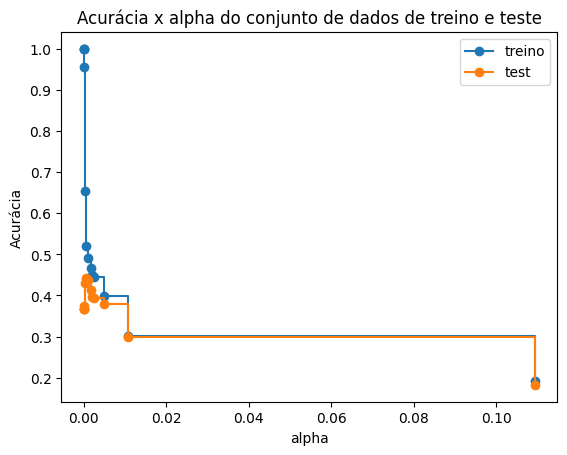

In [ ]:
# Calcule a acurácia de cada árvore na base de treinamento e de teste
train_scores = [model0.score(X_train_small, y_train) for model0 in models0]
test_scores = [model0.score(X_test_small, y_test) for model0 in models0]

#Monte um gráfico da acurácia em função do ccp_alpha
fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")

ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

ax.legend()
plt.show()

In [ ]:
# Selecione a melhor árvore com melhor acurácia na base de teste
list_of_index = []
for idx, value in enumerate(test_scores):
    if value == max(test_scores):
        list_of_index.append(idx)

best_model = models0[max(list_of_index)]
best_model

DecisionTreeClassifier(ccp_alpha=0.0005446742980621993, random_state=101)

In [ ]:
best_model.score(X_test_small, y_test)

0.4428232100441127

# Adicionando +3 variáveis

In [ ]:
X_train_medium = X_train.iloc[:,:6].copy()
X_test_medium = X_test.iloc[:,:6].copy()
X_test_medium.shape, X_train_medium.shape, y_test.shape, y_train.shape

((2947, 6), (7352, 6), (2947, 1), (7352, 1))

In [ ]:
# Ajustando uma árvore de decisão com número mínimo de observações por folha = 20
dt1 = DecisionTreeClassifier(min_samples_leaf=20)
path1 = dt1.cost_complexity_pruning_path(X_train_medium, y_train)
#Calculando os ccp_alphas
ccp_alphas = path1.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])

In [ ]:
%%time
models1 = []
for ccp_alpha in ccp_alphas:
    model1 = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=101).fit(X_train_medium, y_train)
    models1.append(model1)

CPU times: user 17 s, sys: 20.5 ms, total: 17.1 s
Wall time: 17.1 s


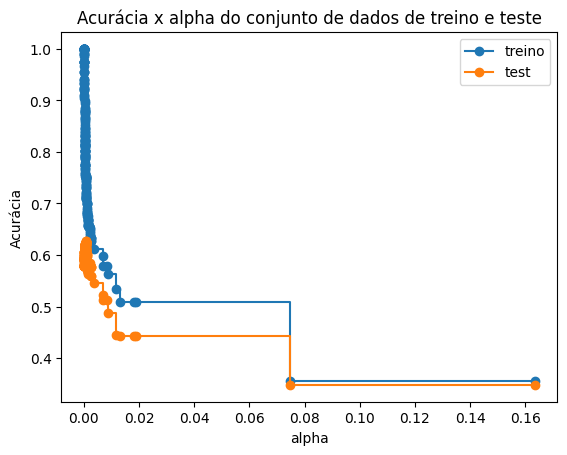

In [ ]:
train_scores = [model1.score(X_train_medium, y_train) for model1 in models1]
test_scores = [model1.score(X_test_medium, y_test) for model1 in models1]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")

ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

ax.legend()
plt.show()

In [ ]:
list_of_index = []
for idx, value in enumerate(test_scores):
    if value == max(test_scores):
        list_of_index.append(idx)

best_model = models1[max(list_of_index)]
best_model

DecisionTreeClassifier(ccp_alpha=0.0007237804775698069, random_state=101)

In [ ]:
best_model.score(X_test_medium, y_test)

0.6280963691890058

# Comentário
Adicionando mais 3 variávies foi possível aumentar a acurácia em quase 0,1873.
